In [1]:
# import zipfile
# import os

# # Define the path to the zip file and the extraction directory
# zip_file_path = '/content/drive/MyDrive/Cat_and_Dog Dataset/Cat_and_Dog.zip'
# extraction_dir = '/content/drive/MyDrive/Cat_and_Dog Dataset'

# # Create the extraction directory if it doesn't exist
# os.makedirs(extraction_dir, exist_ok=True)

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_dir)

# print(f'Contents of {zip_file_path} have been extracted to {extraction_dir}')


Contents of /content/drive/MyDrive/Cat_and_Dog Dataset/Cat_and_Dog.zip have been extracted to /content/drive/MyDrive/Cat_and_Dog Dataset


# **Connect The Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**

In [1]:
train_data = "/content/drive/MyDrive/Cat_and_Dog Dataset/training_set"
test_data = "/content/drive/MyDrive/Cat_and_Dog Dataset/test_set"

# **Import Libraries**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# **Network Structure**

In [3]:
# model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Dropout(0.5),
#                                     tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Dropout(0.5),
#                                     tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(512, activation="relu"),
#                                     tf.keras.layers.Dropout(0.5),
#                                     tf.keras.layers.Dense(1, activation="sigmoid")])

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# **Summary**

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

# **Compile**

In [6]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# **Preprocessing**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (150,150),
    batch_size=20,
    class_mode="binary",
    subset='training')

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size = (150,150),
    batch_size=20,
    class_mode="binary")

validation_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (150,150),
    batch_size=20,
    class_mode="binary",
    subset="validation")


Found 6132 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.
Found 1532 images belonging to 1 classes.


In [9]:
for data_batch,label_batch in train_generator:
  print("Data Batch Shape : ", data_batch.shape)
  print("Label Batch Shape : ", label_batch.shape)
  break

Data Batch Shape :  (20, 150, 150, 3)
Label Batch Shape :  (20,)


In [10]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# **Model Training**

In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=10,
                              validation_data=validation_generator, validation_steps=validation_steps)

<ipython-input-11-a0e37373e6c0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=10,


Epoch 1/10
306/306 [==============================] - 88s 235ms/step - loss: 0.6486 - accuracy: 0.9980 - val_loss: 3.3397 - val_accuracy: 0.9072
Epoch 2/10
306/306 [==============================] - 39s 128ms/step - loss: 0.4844 - accuracy: 0.9998 - val_loss: 30.8190 - val_accuracy: 0.2316
Epoch 3/10
306/306 [==============================] - 35s 113ms/step - loss: 0.6072 - accuracy: 0.9997 - val_loss: 0.6028 - val_accuracy: 0.9750
Epoch 4/10
306/306 [==============================] - 39s 128ms/step - loss: 0.1504 - accuracy: 1.0000 - val_loss: 0.5230 - val_accuracy: 0.9520
Epoch 5/10
306/306 [==============================] - 39s 129ms/step - loss: 1.0947 - accuracy: 0.9984 - val_loss: 1.5804 - val_accuracy: 1.0000
Epoch 6/10
306/306 [==============================] - 36s 117ms/step - loss: 0.7838 - accuracy: 1.0000 - val_loss: 0.3731 - val_accuracy: 0.9993
Epoch 7/10
306/306 [==============================] - 36s 116ms/step - loss: 0.3400 - accuracy: 0.9998 - val_loss: 0.2046 - val_a

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)


101/101 [==============================] - 9s 85ms/step - loss: 0.0084 - accuracy: 0.9995


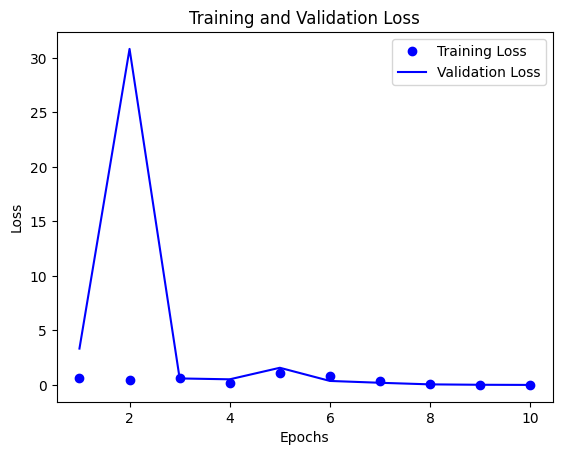

Text(0, 0.5, 'Accuracy')

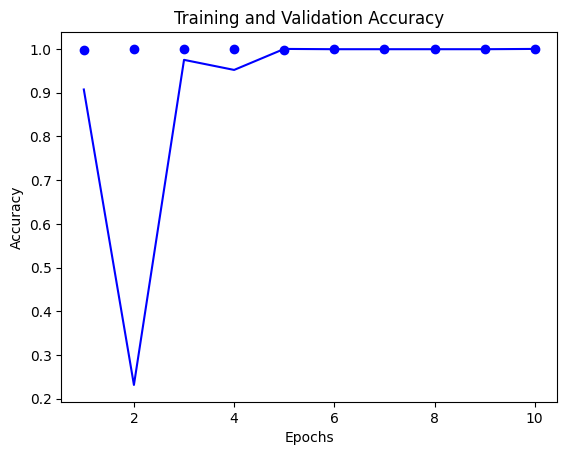

In [13]:
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")